In [19]:
import glob
import cv2
import numpy as np
#Importing Training Data 

train1all = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_0/all/*.bmp")]
train1hem = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_0/hem/*.bmp")]
train2all = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_1/all/*.bmp")]
train2hem = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_1/hem/*.bmp")]
train3all = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_2/all/*.bmp")]
train3hem = [cv2.imread(file) for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/C-NMC_training_data/fold_2/hem/*.bmp")]

In [20]:
trainall = train1all +train2all +train3all
trainhem = train1hem +train2hem +train3hem

trainall = train1all +train2all +train3all
trainhem = train1hem +train2hem +train3hem
y_train = [1]*len(trainall) + [0]*len(trainhem) #Setting 1s to Leukemia Immature Cell and 0s to Normal Cell
x_train = trainall+trainhem
y_train = np.array(y_train)
x_train = np.array(x_train)

In [21]:
print('Class Imbalance:', len(trainall), len(trainhem))  #Class imbalance

#Flipping Minor class sample to generate more samples
trainhemTemp = np.array(trainhem)
trainhemF = np.flipud(trainhemTemp) #Flip Vertically
#Adding In Augmented Data to Balance Classes
y_trainTemp = np.zeros(len(trainhemF)) #Labels 0 = Normal Cell
x_train = np.concatenate((x_train, trainhemF), axis=0)
y_train = np.concatenate((y_train, y_trainTemp), axis=0)

print('New Class Distribution', len(trainall), 2*len(trainhem))

Class Imbalance: 7272 3389
New Class Distribution 7272 6778


In [31]:
#Importing Testing Data
import pandas as pd

ylabels = pd.read_csv (r'C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/validation_data/C-NMC_test_prelim_phase_data_labels.csv')

x_test= []
y_test= []

for file in glob.glob("C:/Users/Josh/Documents/UofC ChemE Content/BMEN 415 - Sensor and Data Analytics/Project Data/validation_data/C-NMC_test_prelim_phase_data/*.bmp"):
    img= cv2.imread(file)
    x_test.append(img)
    index = np.where(ylabels ==file.split("\\")[1])[0]
    value = ylabels.iat[int(index), 2]
    y_test.append(value)   
                      


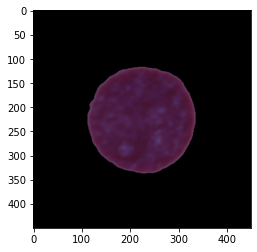

In [23]:
#Reviewing and Resizing Images To Be Smaller
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = x_test[1]
imgplot = plt.imshow(image)
plt.show()

In [33]:
#Resizing Images to be Smaller
image = train1all[0]
resized_image = cv2.resize(image, dsize=(128,128), interpolation=cv2.INTER_CUBIC)
x_Strain = [resized_image]*len(x_train)
x_Stest = [resized_image]*len(x_test)

for n in range(len(x_train)):
    x_Strain[n] =  cv2.resize(x_train[n], dsize=(128,128), interpolation=cv2.INTER_CUBIC)

for i in range(len(x_test)):
    x_Stest[i] =  cv2.resize(x_test[i], dsize=(128,128), interpolation=cv2.INTER_CUBIC)
    

In [34]:
#Normalizing RBG Values
x_Strain = np.array(x_Strain)
x_Ntrain = x_Strain.astype("float32") / 255

x_Stest = np.array(x_Stest)
x_Ntest = x_Stest.astype("float32") / 255

print("x_Ntrain shape:", x_Ntrain.shape)
print(x_Ntrain.shape[0], "train samples")

x_Ntrain shape: (14050, 128, 128, 3)
14050 train samples


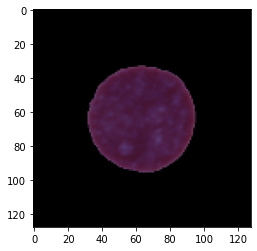

In [38]:

#Reviewing and Resizing Images To Be Smaller
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = x_Ntest[1]
imgplot = plt.imshow(image)
plt.show()


In [50]:
#Experimenting with One-Hot Encoding as Recommeneded by the TA's
y_Htrain = np.empty([len(y_train),2])
y_Htrain[:,0] = y_train
y_Htrain[:,1]= 1-y_train

y_Htest = np.empty([len(y_test),2])
y_Htest[:,0] = y_test
y_Htest[:,1]= 1-y_test



In [55]:
#Building the Model
from keras.layers import Activation, Dense
from keras.models import Sequential 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = x_Strain[1].shape #128, 128, 3

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2880050   
_________________________________________________________________
activation_4 (Activation)    (None, 50)               

In [48]:
print(type(x_Ntest), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [56]:
batch_size = 200
epochs = 30

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

training = model.fit(x_Ntrain, y_Htrain, batch_size=batch_size, epochs=epochs, validation_data=(x_Ntest,y_Htest))

Epoch 1/30
71/71 [==============================] - 53s 734ms/step - loss: 0.5132 - accuracy: 0.7604 - val_loss: 0.6209 - val_accuracy: 0.6920
Epoch 2/30
71/71 [==============================] - 60s 854ms/step - loss: 0.4685 - accuracy: 0.7889 - val_loss: 0.6626 - val_accuracy: 0.6502
Epoch 3/30
71/71 [==============================] - 61s 863ms/step - loss: 0.4454 - accuracy: 0.8021 - val_loss: 0.6604 - val_accuracy: 0.6588
Epoch 4/30
71/71 [==============================] - 61s 866ms/step - loss: 0.4031 - accuracy: 0.8228 - val_loss: 0.7129 - val_accuracy: 0.6465
Epoch 5/30
71/71 [==============================] - 62s 872ms/step - loss: 0.3734 - accuracy: 0.8348 - val_loss: 0.6929 - val_accuracy: 0.6690
Epoch 6/30
71/71 [==============================] - 61s 864ms/step - loss: 0.3318 - accuracy: 0.8550 - val_loss: 0.7920 - val_accuracy: 0.6513
Epoch 7/30
71/71 [==============================] - 59s 828ms/step - loss: 0.3092 - accuracy: 0.8674 - val_loss: 0.8143 - val_accuracy: 0.6427

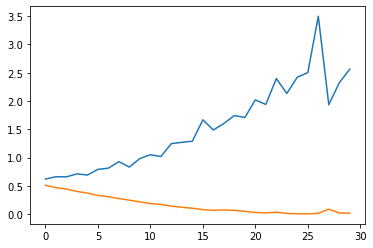

In [57]:
xl = list(range(epochs))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( xl, vy,  label='Validation' )
plt.plot( xl, ty, label='Train' )
plt.show()


In [46]:
y_test = np.array(y_test)

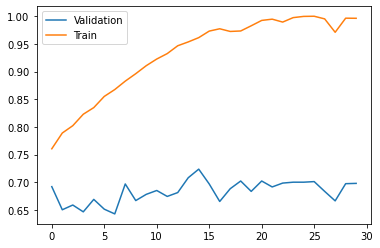

In [58]:
xl = list(range(epochs))
vy = training.history['val_accuracy']
ty = training.history['accuracy']

plt.plot( xl, vy,  label='Validation' )
plt.plot( xl, ty, label='Train' )
plt.legend()
plt.show()

In [59]:
model.evaluate(x_Ntest, y_Htest)

from sklearn.metrics import confusion_matrix
y_Hpred = model.predict(x_Ntest)
y_Hpred = np.round(y_Hpred, decimals=0)

confusion_matrix(y_Htest[:,0], y_Hpred[:,0])

59/59 [==============================] - 2s 38ms/step - loss: 2.5623 - accuracy: 0.6979


array([[ 228,  420],
       [ 143, 1076]], dtype=int64)